# BEE-PLANT INTERACTION ANALYSIS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beeplant/bee-plant interaction dataset.xlsx


**READ DATA**

In [2]:
df=pd.read_excel('/kaggle/input/beeplant/bee-plant interaction dataset.xlsx')
df

,S/No,species_name,family,sex,identifier,dec_long (decimal degrees),dec_lat (decimal degrees),elevation (m a.s.l.),MAT (°C),date_of_collection,forage_resource,family.1,life_form,collection_method,grazing_intensity,season
0,1,Acunomia senticosa (Vachal 1897),Halictidae,Female,A. Pauly,36.0478,-3.5657,1065,23.717757,2019-12-22,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,low grazing intensity,long_rain
1,2,Acunomia somalica (Friese 1908),Halictidae,Female,A. Pauly,37.5968,-3.3682,940,23.350731,2020-01-08,Tephrosia densiflora Hook.f.,Fabaceae,Perennial herb,sweep net,medium grazing intensity,long_rain
2,3,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,NaN,NaN,NaN,pan trap,medium grazing intensity,long_rain
3,4,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,medium grazing intensity,long_rain
4,5,Afranthidium indet1,Megachilidae,Female,J. Lasway,36.7848,-3.4002,1216,21.161605,2019-12-26,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,2687,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.4956,-3.4079,1330,21.397900,2019-12-26,Schkuhria pinnata (Lam.) Kuntze,Asteraceae,Annual herb,sweep net,high grazing intensity,long_rain
2687,2688,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,Gutenbergia cordifolia Benth. ex Oliv.,Asteraceae,Annual herb,sweep net,medium grazing intensity,long_rain
2688,2689,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
2689,2690,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.5838,-3.3562,1441,20.204674,2019-12-26,Solanum lycopersicum L.,Solanaceae,Annual herb,sweep net,medium grazing intensity,long_rain


**DROP UNNECESSARY COLUMNS**

In [3]:
df.drop(columns=['S/No','dec_long (decimal degrees)','dec_lat (decimal degrees)','elevation (m a.s.l.)','MAT (°C)','date_of_collection'],inplace=True)
df

,species_name,family,sex,identifier,forage_resource,family.1,life_form,collection_method,grazing_intensity,season
0,Acunomia senticosa (Vachal 1897),Halictidae,Female,A. Pauly,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,low grazing intensity,long_rain
1,Acunomia somalica (Friese 1908),Halictidae,Female,A. Pauly,Tephrosia densiflora Hook.f.,Fabaceae,Perennial herb,sweep net,medium grazing intensity,long_rain
2,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,NaN,NaN,NaN,pan trap,medium grazing intensity,long_rain
3,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,medium grazing intensity,long_rain
4,Afranthidium indet1,Megachilidae,Female,J. Lasway,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
...,...,...,...,...,...,...,...,...,...,...
2686,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,Schkuhria pinnata (Lam.) Kuntze,Asteraceae,Annual herb,sweep net,high grazing intensity,long_rain
2687,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,Gutenbergia cordifolia Benth. ex Oliv.,Asteraceae,Annual herb,sweep net,medium grazing intensity,long_rain
2688,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
2689,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,Solanum lycopersicum L.,Solanaceae,Annual herb,sweep net,medium grazing intensity,long_rain


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# WITHOUT MISSING VALUE IMPUTATION

In [5]:
df.isna().sum()

species_name            0
family                  0
sex                     0
identifier              0
forage_resource      1803
family.1             1856
life_form            1856
collection_method       0
grazing_intensity       0
season                  0
dtype: int64

**LABEL ENCODING**

In [6]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['species_name','family','sex','collection_method','identifier','forage_resource','family.1','life_form','grazing_intensity','season']


encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [7]:
df.isna().sum()

species_name         0
family               0
sex                  0
identifier           0
forage_resource      0
family.1             0
life_form            0
collection_method    0
grazing_intensity    0
season               0
dtype: int64

**MODELLING**

In [8]:
X=df[['family','life_form','season']]
y=df['sex']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [10]:
X1=df[['forage_resource','family.1','life_form']]
y1=df['collection_method']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


In [12]:
X3=df[['species_name']]
y3=df[['family']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3,test_size=0.3, random_state = 0)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.values.ravel())
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.995049504950495
Random Forest Accuracy: 0.995049504950495


# WITH MODE IMPUTATION

In [15]:
# Mode imputation
df['forage_resource'].fillna(df['forage_resource'].mode()[0], inplace=True)
# Mode imputation
df['life_form'].fillna(df['life_form'].mode()[0], inplace=True)
# Mode imputation
df['family.1'].fillna(df['family.1'].mode()[0], inplace=True)


In [16]:
df

,species_name,family,sex,identifier,forage_resource,family.1,life_form,collection_method,grazing_intensity,season
0,0,3,0,0,91,23,9,1,1,1
1,1,3,0,0,96,13,6,1,2,1
2,2,3,0,0,112,27,14,0,2,1
3,2,3,0,0,91,23,9,1,2,1
4,3,4,0,2,76,27,14,1,2,1
...,...,...,...,...,...,...,...,...,...,...
2686,171,3,0,0,86,4,2,1,0,1
2687,171,3,0,0,42,4,2,1,2,1
2688,171,3,0,0,76,27,14,1,2,1
2689,171,3,0,0,92,23,2,1,2,1


In [17]:
df.isna().sum()

species_name         0
family               0
sex                  0
identifier           0
forage_resource      0
family.1             0
life_form            0
collection_method    0
grazing_intensity    0
season               0
dtype: int64

**MODELLING**

In [18]:
X=df[['family','life_form','season']]
y=df['sex']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [20]:
X1=df[['forage_resource','family.1','life_form']]
y1=df['collection_method']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


In [22]:
X3=df[['species_name']]
y3=df[['family']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3,test_size=0.3, random_state = 0)


In [24]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.values.ravel())
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.995049504950495
Random Forest Accuracy: 0.995049504950495


# REMOVING MISSING VALUES

In [25]:
df.dropna(inplace=True)

In [26]:
df['season'].value_counts()

season
1    1479
2     707
0     505
Name: count, dtype: int64

In [27]:
df['grazing_intensity'].value_counts()

grazing_intensity
2    1109
0     891
1     691
Name: count, dtype: int64

**KMODES AND OPTIMIZATION**

In [28]:
from kmodes.kmodes import KModes

In [29]:
# Subset data for 'fgrazing_intensity'
subset_data_family1 = df[['grazing_intensity','family.1', 'species_name', 'sex', 'identifier', 'forage_resource', 'family', 'life_form', 'collection_method', 'season']]


# Subset data for 'season'
subset_data_family2 = df[['season','grazing_intensity','family.1', 'species_name', 'sex', 'identifier', 'forage_resource', 'family', 'life_form', 'collection_method']]


In [30]:
# Initialize KModes model for 'grazing_intensity'
km_family1 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_family1 = km_family1.fit_predict(subset_data_family1)

# Initialize KModes model for 'grazing_intensity'
km_family2 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_family2 = km_family2.fit_predict(subset_data_family2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 189, cost: 8766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 274, cost: 7877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 997, cost: 8134.0
Run 3, iteration: 2/100, moves: 101, cost: 8134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 100, cost: 8839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 462, cost: 8726.0
Run 5, iteration: 2/100, moves: 344, cost: 8726.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 441, cost: 8214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 

In [31]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [32]:
# Function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KModes(n_clusters=i, init='Huang', n_init=5, verbose=0)
        km.fit(data)
        distortions.append(km.cost_)
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

In [33]:
# Function to compute silhouette scores for different numbers of clusters
def compute_silhouette_scores(data, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        km = KModes(n_clusters=i, init='Huang', n_init=5, verbose=0)
        labels = km.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

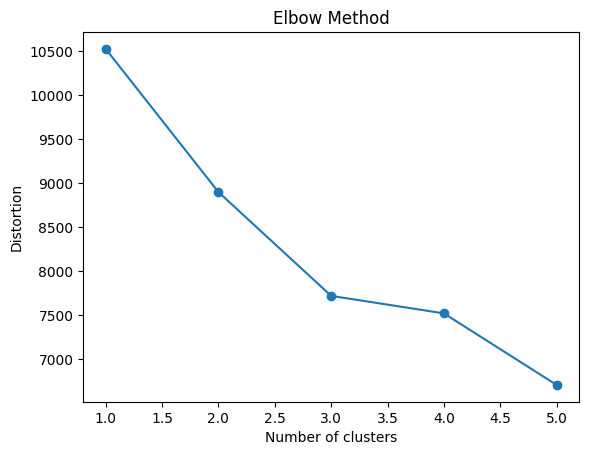

In [34]:
# Find optimal number of clusters for 'grazing_intensity'
find_optimal_clusters(subset_data_family1, 5)

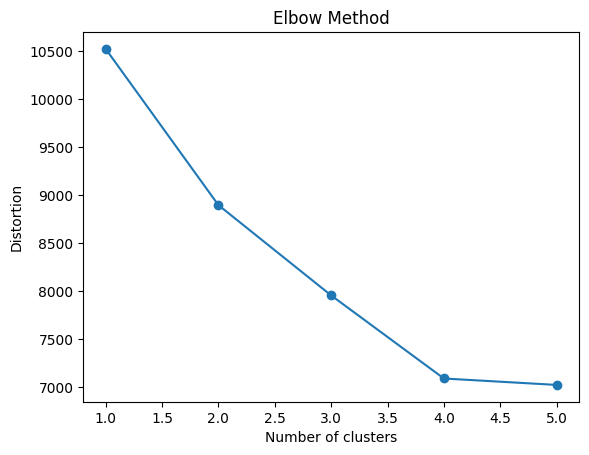

In [35]:
# Find optimal number of clusters for 'season'
find_optimal_clusters(subset_data_family2, 5)

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer


For n_clusters = 2, the average silhouette score is : 0.4217131962789678


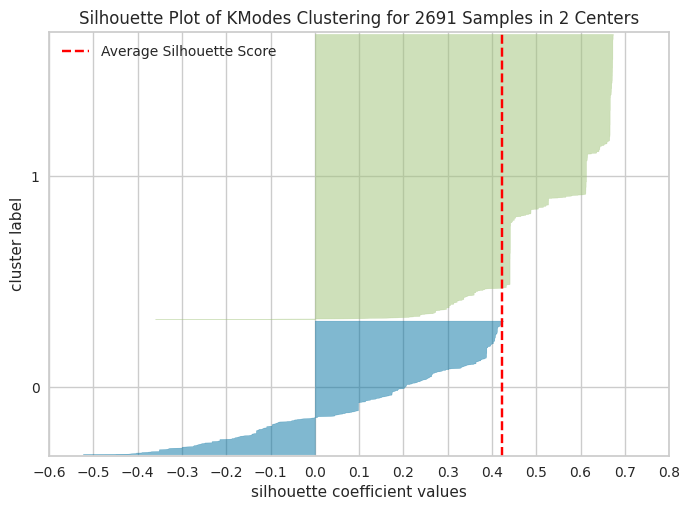

For n_clusters = 3, the average silhouette score is : 0.12191713856656401


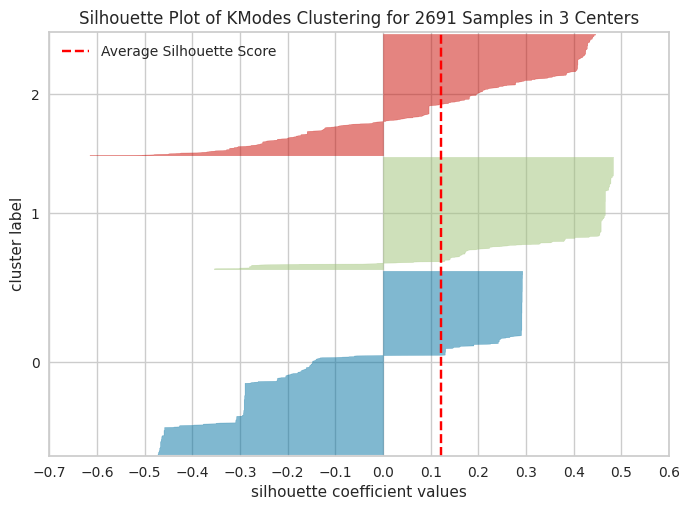

For n_clusters = 4, the average silhouette score is : 0.11847211831476152


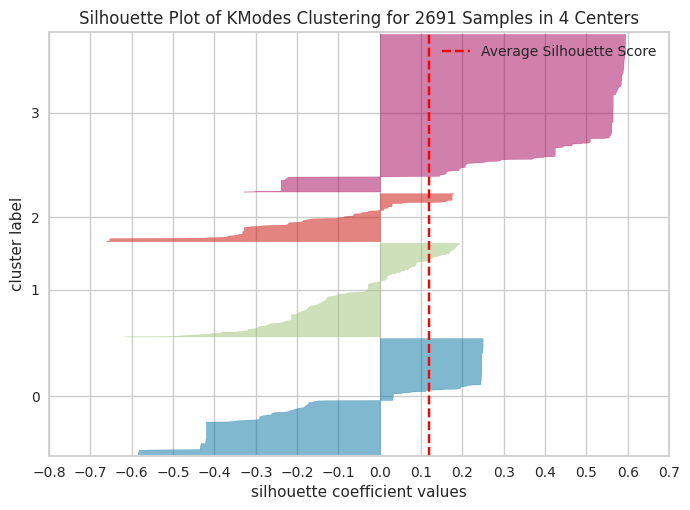

For n_clusters = 5, the average silhouette score is : 0.010749824756054927


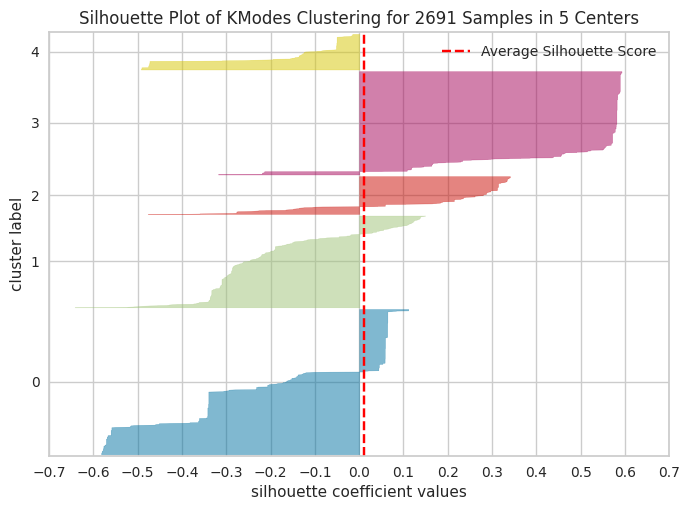

For n_clusters = 6, the average silhouette score is : -0.10461330893310763


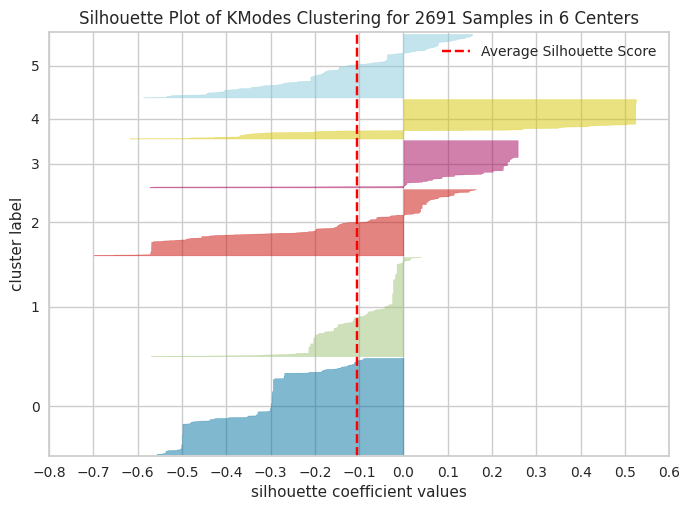

In [37]:
cluster_range = range(2, 7)

# Plot silhouette scores and visualizations for different cluster numbers
for n_clusters in cluster_range:
    # KModes clustering
    km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0)
    cluster_labels = km.fit_predict(subset_data_family1)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(subset_data_family1, cluster_labels)

    # Create a SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

    # Fit the visualizer
    visualizer.fit(subset_data_family1, cluster_labels)

    # Show the plot with silhouette score as title
    plt.title(f'Silhouette Analysis for {n_clusters} Clusters (Score: {silhouette_avg:.2f})')
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

    visualizer.show()

For n_clusters = 2, the average silhouette score is : 0.4218137438778274


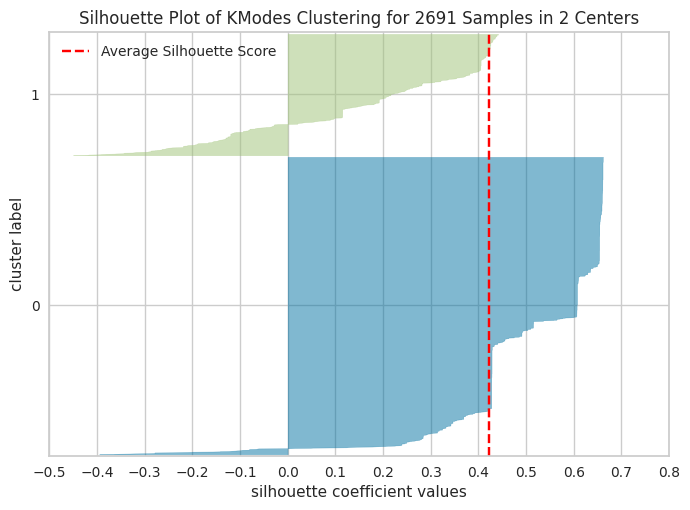

For n_clusters = 3, the average silhouette score is : 0.2263758095407246


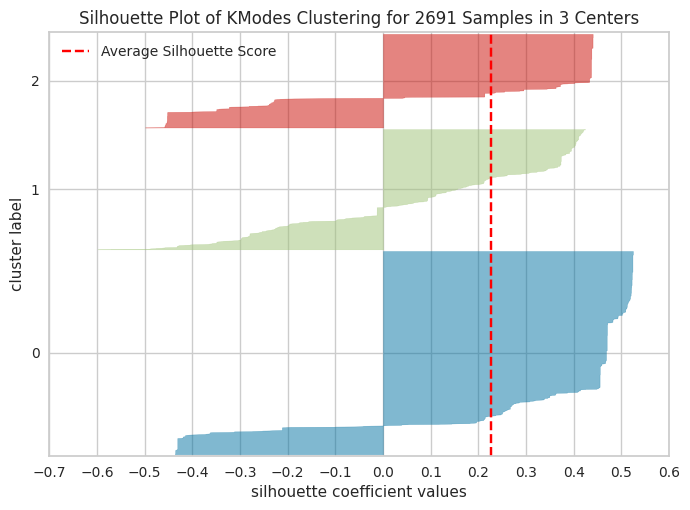

For n_clusters = 4, the average silhouette score is : 0.01901199808502124


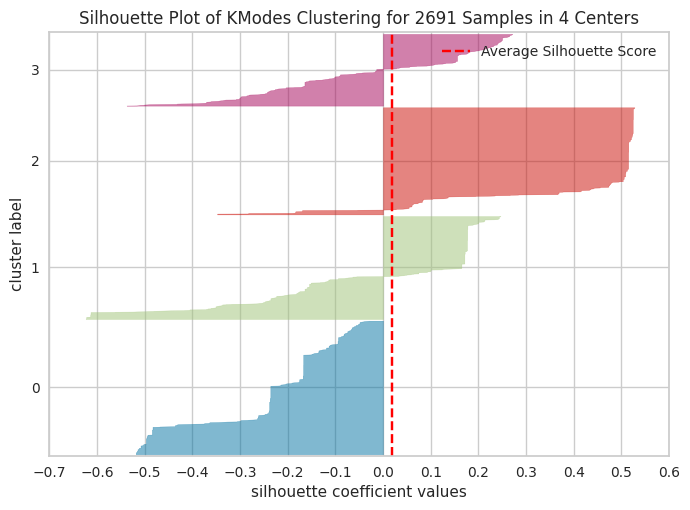

For n_clusters = 5, the average silhouette score is : -0.055389977742090195


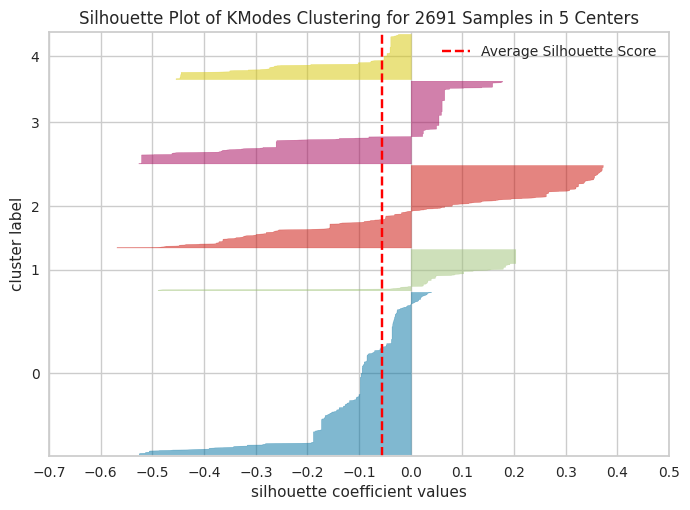

For n_clusters = 6, the average silhouette score is : 0.10326725347148978


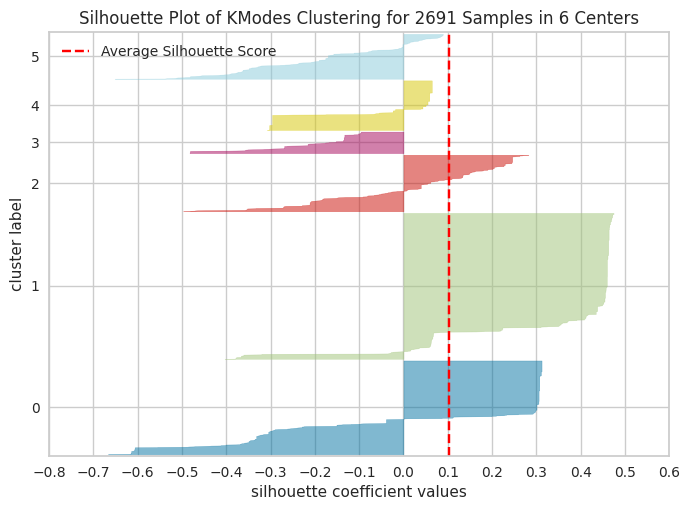

In [38]:
cluster_range = range(2, 7)

# Plot silhouette scores and visualizations for different cluster numbers
for n_clusters in cluster_range:
    # KModes clustering
    km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0)
    cluster_labels = km.fit_predict(subset_data_family2)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(subset_data_family2, cluster_labels)

    # Create a SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

    # Fit the visualizer
    visualizer.fit(subset_data_family2, cluster_labels)

    # Show the plot with silhouette score as title
    plt.title(f'Silhouette Analysis for {n_clusters} Clusters (Score: {silhouette_avg:.2f})')
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

    visualizer.show()

**WITHOUT CROSS VALIDATION**

In [39]:
X=df[['family','life_form','season']]
y=df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [40]:
X1=df[['forage_resource','family.1','life_form']]
y1=df['collection_method']
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.3, random_state = 0)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


In [41]:
X3=df[['species_name']]
y3=df[['family']]
X_train, X_test, y_train, y_test = train_test_split(X3, y3,test_size=0.3, random_state = 0)


In [42]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.values.ravel())
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.995049504950495
Random Forest Accuracy: 0.995049504950495


**WITH CROSS VALIDATION**

In [43]:
from sklearn.model_selection import cross_val_score

# Define your features and target variable
X = df[['family', 'life_form', 'season']]
y = df['sex']

# Create Logistic Regression model
clf = LogisticRegression(solver='liblinear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score: {:.2f}'.format(cv_scores.mean()))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model on the training set
clf.fit(X_train, y_train)

# Print accuracy on training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

# Print accuracy on test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Cross-validation scores: [0.94805195 0.94981413 0.94981413 0.94795539 0.89962825]
Mean cross-validation score: 0.94
Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [44]:
# Define your features and target variable
X1 = df[['forage_resource', 'family.1', 'life_form']]
y1 = df['collection_method']

# Create Logistic Regression model
clf = LogisticRegression(solver='liblinear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X1, y1, cv=5)

# Print cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score: {:.2f}'.format(cv_scores.mean()))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# Train the model on the training set
clf.fit(X_train, y_train)

# Print accuracy on training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

# Print accuracy on test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Cross-validation scores: [0.97588126 0.98327138 0.99442379 0.96096654 0.97769517]
Mean cross-validation score: 0.98
Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


In [45]:
# Define your features and target variable
X3 = df[['species_name']]
y3 = df['family']

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X3, y3, cv=5)
dt_accuracy = dt_scores.mean()

# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X3, y3, cv=5)
rf_accuracy = rf_scores.mean()

print("Decision Tree Cross-Validation Accuracy:", dt_accuracy)
print("Random Forest Cross-Validation Accuracy:", rf_accuracy)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

# Decision Tree
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_predictions)

print("Decision Tree Test Accuracy:", dt_accuracy_test)
print("Random Forest Test Accuracy:", rf_accuracy_test)


Decision Tree Cross-Validation Accuracy: 0.778519356373844
Random Forest Cross-Validation Accuracy: 0.778519356373844
Decision Tree Test Accuracy: 0.995049504950495
Random Forest Test Accuracy: 0.995049504950495


# **TRYING SPECIES NAME CLASSIFICATION**

In [46]:
df1=pd.read_excel('/kaggle/input/beeplant/bee-plant interaction dataset.xlsx')
df1

,S/No,species_name,family,sex,identifier,dec_long (decimal degrees),dec_lat (decimal degrees),elevation (m a.s.l.),MAT (°C),date_of_collection,forage_resource,family.1,life_form,collection_method,grazing_intensity,season
0,1,Acunomia senticosa (Vachal 1897),Halictidae,Female,A. Pauly,36.0478,-3.5657,1065,23.717757,2019-12-22,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,low grazing intensity,long_rain
1,2,Acunomia somalica (Friese 1908),Halictidae,Female,A. Pauly,37.5968,-3.3682,940,23.350731,2020-01-08,Tephrosia densiflora Hook.f.,Fabaceae,Perennial herb,sweep net,medium grazing intensity,long_rain
2,3,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,NaN,NaN,NaN,pan trap,medium grazing intensity,long_rain
3,4,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,medium grazing intensity,long_rain
4,5,Afranthidium indet1,Megachilidae,Female,J. Lasway,36.7848,-3.4002,1216,21.161605,2019-12-26,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,2687,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.4956,-3.4079,1330,21.397900,2019-12-26,Schkuhria pinnata (Lam.) Kuntze,Asteraceae,Annual herb,sweep net,high grazing intensity,long_rain
2687,2688,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,Gutenbergia cordifolia Benth. ex Oliv.,Asteraceae,Annual herb,sweep net,medium grazing intensity,long_rain
2688,2689,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,2020-01-02,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
2689,2690,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.5838,-3.3562,1441,20.204674,2019-12-26,Solanum lycopersicum L.,Solanaceae,Annual herb,sweep net,medium grazing intensity,long_rain


In [47]:
df1.drop(columns=['S/No','date_of_collection'],inplace=True)
df1

,species_name,family,sex,identifier,dec_long (decimal degrees),dec_lat (decimal degrees),elevation (m a.s.l.),MAT (°C),forage_resource,family.1,life_form,collection_method,grazing_intensity,season
0,Acunomia senticosa (Vachal 1897),Halictidae,Female,A. Pauly,36.0478,-3.5657,1065,23.717757,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,low grazing intensity,long_rain
1,Acunomia somalica (Friese 1908),Halictidae,Female,A. Pauly,37.5968,-3.3682,940,23.350731,Tephrosia densiflora Hook.f.,Fabaceae,Perennial herb,sweep net,medium grazing intensity,long_rain
2,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,NaN,NaN,NaN,pan trap,medium grazing intensity,long_rain
3,"Acunomia theryi (Gribodo, 1894)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,Solanum incanum L.,Solanaceae,Perennial shrub,sweep net,medium grazing intensity,long_rain
4,Afranthidium indet1,Megachilidae,Female,J. Lasway,36.7848,-3.4002,1216,21.161605,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.4956,-3.4079,1330,21.397900,Schkuhria pinnata (Lam.) Kuntze,Asteraceae,Annual herb,sweep net,high grazing intensity,long_rain
2687,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,Gutenbergia cordifolia Benth. ex Oliv.,Asteraceae,Annual herb,sweep net,medium grazing intensity,long_rain
2688,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,37.0264,-3.1259,1380,19.753428,On air,NaN,NaN,sweep net,medium grazing intensity,long_rain
2689,"Zonalictus nomioides (Friese, 1905)",Halictidae,Female,A. Pauly,36.5838,-3.3562,1441,20.204674,Solanum lycopersicum L.,Solanaceae,Annual herb,sweep net,medium grazing intensity,long_rain


In [48]:
# df1.dropna(inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['species_name','family','sex','collection_method','identifier','forage_resource','family.1','life_form','grazing_intensity','season']


encoder = LabelEncoder()

for column in columns_to_encode:
    df1[column] = encoder.fit_transform(df1[column])

In [50]:
X=df1.drop(columns='species_name')
y=df1[['species_name']]

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train.values.ravel())
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Decision Tree Accuracy: 0.6150990099009901
Random Forest Accuracy: 0.6113861386138614


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train.values.ravel())
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.34405940594059403
